## _**Student Performance Factors dataset**_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, pearsonr, spearmanr,kruskal,ttest_ind,f_oneway,kstest, mannwhitneyu
from matplotlib.gridspec import GridSpec

1.Exploratory data analysis

In [2]:
student = pd.read_csv('data/StudentPerformanceFactors.csv')

print(student.info())
print(student.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [3]:
student.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [3]:
student.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [5]:
student.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

In [4]:
student.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [5]:
print(student.isnull().sum())
student.dropna(inplace=True)

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


2.1 : exam score's distribution

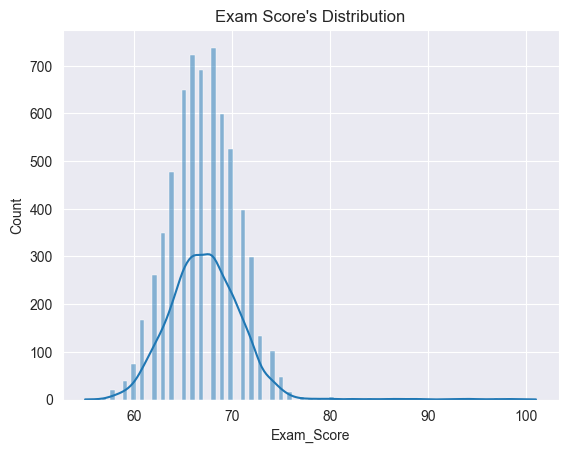

In [6]:
sns.histplot(student["Exam_Score"],kde=True)
plt.title("Exam Score's Distribution")
plt.show()

2.2.Examining the effect of study hours on exam score

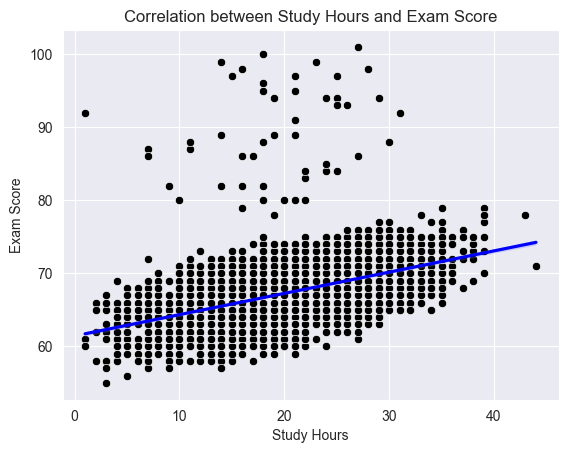

In [7]:
sns.scatterplot(x=student["Hours_Studied"],y=student["Exam_Score"],color='black')
sns.regplot(x=student["Hours_Studied"],y=student["Exam_Score"],scatter=False,color='blue')
plt.title("Correlation between Study Hours and Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [8]:
corr_pearson, p_pearson = pearsonr(student["Hours_Studied"], student["Exam_Score"])
print(f"pearson correlation between Study Hours and Exam Score: {corr_pearson}, p-value = {p_pearson}")

pearson correlation between Study Hours and Exam Score: 0.4451041402651161, p-value = 4.524802143431476e-308


2.3.Investigating the correlation between sleep hours and exam score

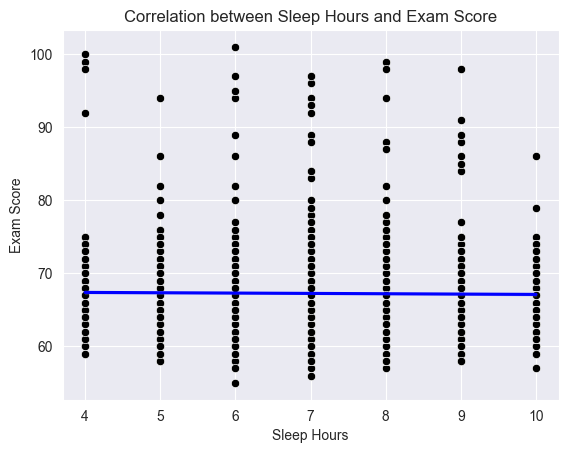

In [9]:
sns.scatterplot(x=student["Sleep_Hours"],y=student["Exam_Score"],color='black')
sns.regplot(x=student["Sleep_Hours"], y=student["Exam_Score"],scatter=False,color='blue')
plt.title("Correlation between Sleep Hours and Exam Score")
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.show()

In [10]:
corr, p = spearmanr(student["Sleep_Hours"], student["Exam_Score"])
print(f"spearman correlation between sleep Hours and Exam Score: {corr}, p-value = {p}")

spearman correlation between sleep Hours and Exam Score: -0.006525547409158689, p-value = 0.6023325272235431


2.4.Examining the effect of parental involvement on students' academic performance

Kolmogorov for High Involvement: P-value=0.0
Kolmogorov for Medium Involvement: P-value=0.0
Kolmogorov for Low Involvement: P-value=0.0
Mann-Whitney U --- high-low --- Statistic=1515134.0, P-value=1.628373108803595e-40
Mann-Whitney U --- high-medium --- Statistic=3440522.5, P-value=8.838614292010961e-20
Mann-Whitney U --- medium-low --- Statistic=2371933.5, P-value=5.726439915898304e-12
Kruskal(All of them at once!) --- Statistic=186.9347432307637, P-value=2.556443915699214e-41


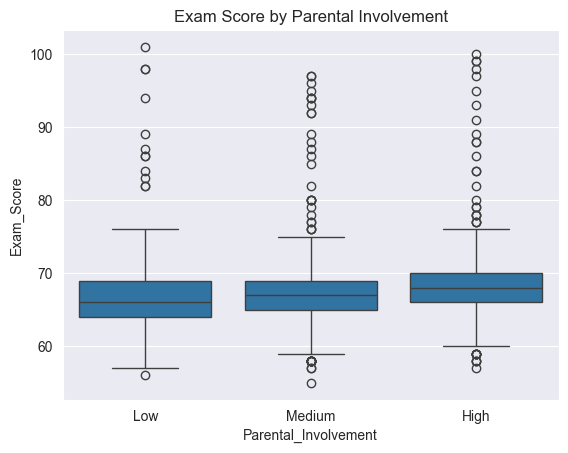

In [11]:
high_involvement = student[student["Parental_Involvement"]=="High"]["Exam_Score"]
medium_involvement = student[student["Parental_Involvement"]=="Medium"]["Exam_Score"]
low_involvement = student[student["Parental_Involvement"]=="Low"]["Exam_Score"]

stat_high, p_high = kstest(high_involvement, 'norm')
stat_medium , p_medium= kstest(medium_involvement, 'norm')
stat_low, p_low = kstest(low_involvement, 'norm')

print(f'Kolmogorov for High Involvement: P-value={p_high}')
print(f'Kolmogorov for Medium Involvement: P-value={p_medium}')
print(f'Kolmogorov for Low Involvement: P-value={p_low}')

if p_high > 0.05 and p_medium > 0.05 and p_low > 0.05:
    stat, p = ttest_ind(low_involvement, medium_involvement, high_involvement)
    print(f'T-Test --- Statistic={stat}, P-value={p}')
else:
    stat, p = mannwhitneyu(high_involvement, low_involvement)
    print(f'Mann-Whitney U --- high-low --- Statistic={stat}, P-value={p}')
    stat, p = mannwhitneyu(high_involvement, medium_involvement)
    print(f'Mann-Whitney U --- high-medium --- Statistic={stat}, P-value={p}')
    stat, p = mannwhitneyu(medium_involvement, low_involvement)
    print(f'Mann-Whitney U --- medium-low --- Statistic={stat}, P-value={p}')
    
    stat, p = kruskal(high_involvement, medium_involvement, low_involvement)
    print(f'Kruskal(All of them at once!) --- Statistic={stat}, P-value={p}')
    
sns.boxplot(x=student["Parental_Involvement"],y=student["Exam_Score"])
plt.title("Exam Score by Parental Involvement")
plt.show()

2.5.Examining the differences between students who have extracurricular activity and those who don't

kruskal test for Extracurricular Activities statistic = 25.50811372544666, p-value = 4.4052643678875923e-07


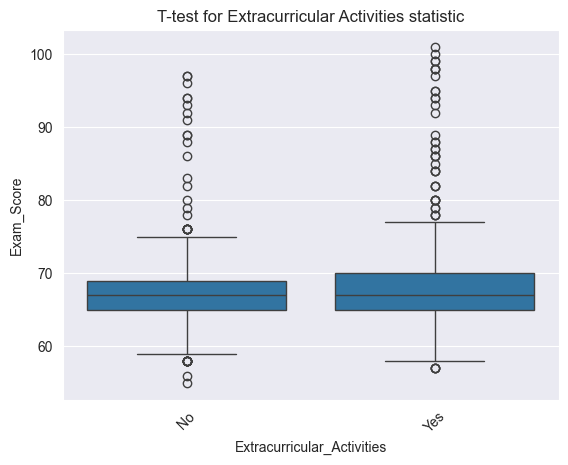

In [28]:
have_ea = student[student["Extracurricular_Activities"] == "Yes"]["Exam_Score"]
d_have_ea = student[student["Extracurricular_Activities"] == "No"]["Exam_Score"]

stat, p = kruskal(have_ea, d_have_ea)

print(f"kruskal test for Extracurricular Activities statistic = {stat}, p-value = {p}")
sns.boxplot(x=student["Extracurricular_Activities"],y=student["Exam_Score"])
plt.xticks(rotation=45)
plt.title("T-test for Extracurricular Activities statistic")
plt.show()

2.6.Examining the Effect of class Attendance on academic performance

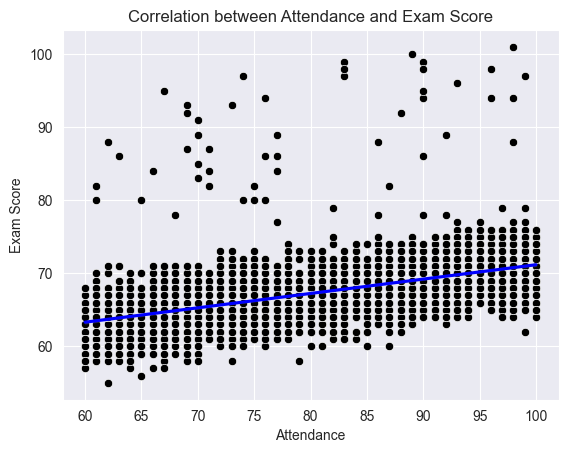

In [13]:
sns.scatterplot(x=student["Attendance"],y=student["Exam_Score"],color='black')
sns.regplot(x=student["Attendance"], y=student["Exam_Score"],scatter=False,color='blue')
plt.title("Correlation between Attendance and Exam Score")
plt.xlabel("Attendance")
plt.ylabel("Exam Score")
plt.show()

In [14]:
corr_pearson, p_pearson = pearsonr(student["Attendance"], student["Exam_Score"])
print(f"pearson correlation between Attendance and Exam Score: {corr_pearson}, p-value = {p_pearson}")

pearson correlation between Attendance and Exam Score: 0.5802585402382587, p-value = 0.0


2.7.Examining the impact of internet access on sleep

T-test for impact of internet access on study hours: statistic = 0.5121655248886929, p-value = 0.6085529082453165


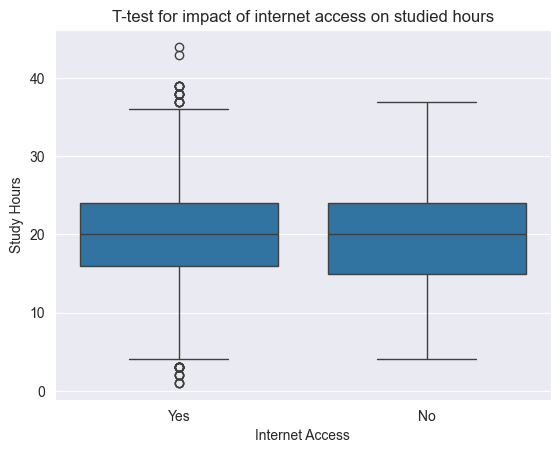

In [15]:
internet_access = student[student["Internet_Access"] == "Yes"]["Hours_Studied"]
no_internet_access = student[student["Internet_Access"] == "No"]["Hours_Studied"]

stat, p = ttest_ind(internet_access, no_internet_access)

print(f"T-test for impact of internet access on study hours: statistic = {stat}, p-value = {p}")

sns.boxplot(x=student["Internet_Access"], y=student["Hours_Studied"])
plt.title("T-test for impact of internet access on studied hours")
plt.xlabel("Internet Access")
plt.ylabel("Study Hours")
plt.show()

2.8.Examining the impact of internet access on Exam score

the impact of internet access on exam score: statistic = 24.602920286368093, p-value = 7.044489846380393e-07


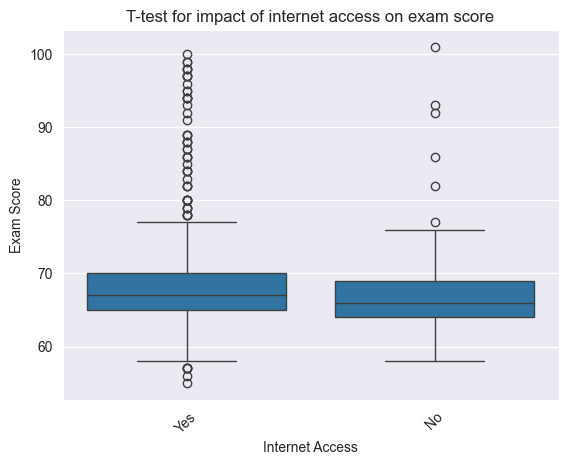

In [16]:
internet_access = student[student["Internet_Access"] == "Yes"]["Exam_Score"]
no_internet_access = student[student["Internet_Access"] == "No"]["Exam_Score"]

stat, p = kruskal(internet_access, no_internet_access)

print(f"the impact of internet access on exam score: statistic = {stat}, p-value = {p}")

sns.boxplot(x=student["Internet_Access"], y=student["Exam_Score"])
plt.xticks(rotation=45)
plt.title("T-test for impact of internet access on exam score")
plt.xlabel("Internet Access")
plt.ylabel("Exam Score")
plt.show()

2.9.Investigating the correlation between exam score and tutoring session

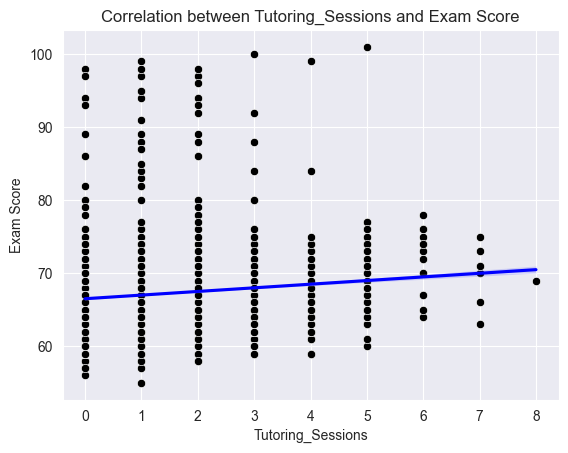

In [17]:
sns.scatterplot(x=student["Tutoring_Sessions"], y=student["Exam_Score"],color='black')
sns.regplot(x=student["Tutoring_Sessions"], y=student["Exam_Score"],scatter=False,color='blue')
plt.title("Correlation between Tutoring_Sessions and Exam Score")
plt.xlabel("Tutoring_Sessions")
plt.ylabel("Exam Score")
plt.show()

In [18]:
corr, p = spearmanr(student["Exam_Score"], student["Tutoring_Sessions"])
print(f"spearman correlation between Tutoring_Sessions and Exam Score = {corr}, p-value = {p}")

spearman correlation between Tutoring_Sessions and Exam Score = 0.16429426285096785, p-value = 7.86798285927765e-40


2.10 : Distribution of exam score by access to resources

f_oneway test for Exam_Score = 45.8895947170518, p-value = 0.0


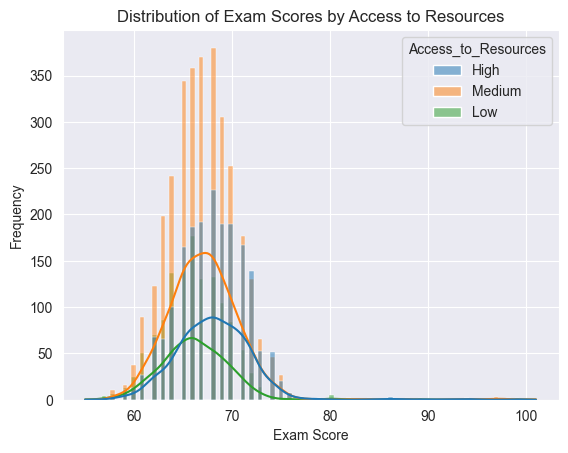

In [29]:
groups = [student[student["Access_to_Resources"]==access]["Exam_Score"] for access in student["Access_to_Resources"]]

stat, p = f_oneway(*groups)
print(f"f_oneway test for Exam_Score = {stat}, p-value = {p}")


sns.histplot(x=student["Exam_Score"], hue=student["Access_to_Resources"],kde=True)
plt.title("Distribution of Exam Scores by Access to Resources")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

2.11 : Distribution of exam score by gender

T-test for female and male score = 0.39386280795717277, p-value = 0.6936955012015205


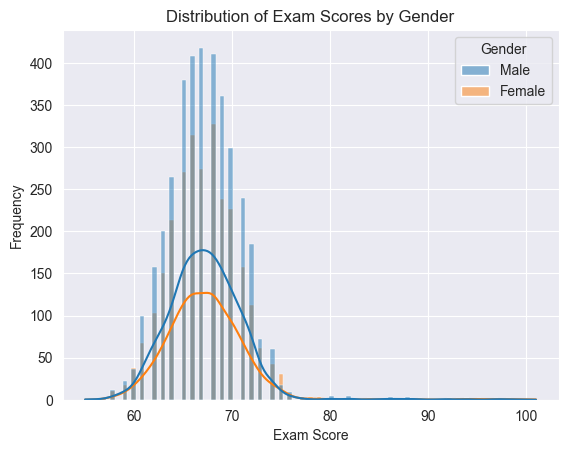

In [19]:
female_score = student[student["Gender"]=="Female"]["Exam_Score"]
male_score = student[student["Gender"]=="Male"]["Exam_Score"]

stat, p = ttest_ind(female_score, male_score)
print(f"T-test for female and male score = {stat}, p-value = {p}")

sns.histplot(x=student["Exam_Score"], hue=student["Gender"],kde=True)
plt.title("Distribution of Exam Scores by Gender")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

2.12:exam score by parental education

Statistic=161996.13593176045, p-value=0.0


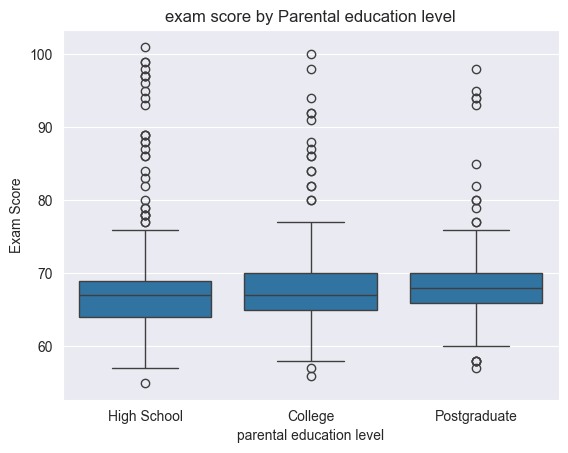

In [37]:
par_ed_lis = [student[student["Parental_Education_Level"] == i].Exam_Score for i in student["Parental_Education_Level"]]
stat, p = kruskal(*par_ed_lis)
print(f'Statistic={stat}, p-value={p}')

sns.boxplot(x=student["Parental_Education_Level"], y=student["Exam_Score"])
plt.title("exam score by Parental education level")
plt.xlabel("parental education level")
plt.ylabel("Exam Score")
plt.show()